# GP 2D Equation

Given the mean-field aproximation to N boson F=1 weakly interacting at $T=0$, we can write the following energy functional: 

\begin{equation}
\begin{split}E[\hat\Psi] &= \iiint d^3r \bigg[ \frac{1}{2}\nabla\Psi_m^*\cdot\nabla\Psi_m^{\,}+\frac{V_{ext}(\vec{r})}{\epsilon}\Psi_m^* \Psi_m^{\,}  \\&+\frac{c_0}{2}\Psi_m^* \Psi_m^{\,}\Psi_n^* \Psi_n^{\,} + \frac{c_2}{2}\Psi_m^* \vec F_{mn}^{\,} \Psi_n^{\,} \cdot \Psi_l^* \vec F_{lk} \Psi_k^{\,}\\ &+p \vec{B}\cdot \Psi_n^* \vec{F}_{nm}^{\,}\Psi_m^{\,}+q \Psi_n^* \big[(\vec{B}\cdot\vec{F})^2\big]_{nm}\Psi_m^{\,} \bigg] \end{split}
\end{equation}

$m=-1,0,1$

$$\text{Unidad de energia:  }\epsilon = \hbar \omega$$ 

$$\text{Unidad de tiempo:  }\tilde{t}=\frac{1}{\omega}$$

$$\text{Unidad de longitud:  }\ell_0 = \sqrt{\frac{\hbar}{m\omega}}$$

$c_0 = \frac{g_0+2g_2}{3}$ y $c_1 = \frac{g_2-g_0}{3}$, $g_i = 4\pi N \frac{a_i}{\ell_0}$


, assuming just one spin proyection distinct from zero, absence of external magnetic field, and an optical trapping given by $V_{ext}$

$$ \Psi_m^* \vec F_{mn}^{\,} \Psi_n^{\,} \cdot \Psi_l^* \vec F_{lk} \Psi_k^{\,} = 2\big( \Psi_0\Psi_0\Psi_1^*\Psi_{-1}^* + \Psi_0^*\Psi_0^*\Psi_1\Psi_{-1} + |\Psi_0|^2|\Psi_1|^2 +|\Psi_0|^2|\Psi_{-1}|^2\big)  + (|\Psi_{1}|^2-|\Psi_{-1}|^2)^2  $$

\begin{equation}
\begin{split}E[\Psi_0] &= \iiint d^3r \bigg[ \frac{1}{2}\nabla\Psi_0^*\cdot\nabla\Psi_0^{\,}+\tilde{V}_{ext}(\vec{r})\Psi_0^* \Psi_0^{\,}  \\&+\frac{c_0}{2}\Psi_0^* \Psi_0^{\,}\Psi_0^* \Psi_0^{\,} \bigg] \end{split}
\end{equation}

\begin{equation}
\begin{split}E[\Psi_{\pm1}] &= \iiint d^3r \bigg[ \frac{1}{2}\nabla\Psi_{\pm1}^*\cdot\nabla\Psi_{\pm1}^{\,}+\tilde{V}_{ext}(\vec{r})\Psi_{\pm1}^* \Psi_{\pm1}^{\,}  \\&+\frac{c_0+c_2}{2}\Psi_{\pm1}^* \Psi_{\pm1}^{\,}\Psi_{\pm1}^* \Psi_{\pm1}^{\,}\bigg] \end{split}
\end{equation}

finally suppose a z-direction confinment greater than on x,y-directions,  such that $\tilde{V}_{ext}=V_{ext}/\epsilon \approx \frac{1}{2} \gamma_z^2 z^2 + v_{2d}(x,y)/\epsilon$, $\gamma_z= \frac{\omega_z}{\omega}>>1$

con $g_{2D}=(c_0+c_2) \sqrt{\frac{\gamma_z}{2\pi}} , \,c_0\sqrt{\frac{\gamma_z}{2\pi}}$, [Ref0](http://www3.physics.ox.ac.uk/groups/qubit/fetch.asp?url=groupwebsite/papers/paper103.pdf)

Applying Euler-Lagrange we obtain the dynamical equation for $\Psi$  $$\frac{\delta E_{2D}}{\delta \Psi}=i\frac{\partial\Psi}{\partial t}= -\frac{\partial\Psi}{\partial \tau}$$

$$i\frac{\partial\Psi}{\partial t} = -\frac{1}{2}\nabla^2 \Psi +\tilde{v}_{2D}\Psi+ g_{2D}|\Psi|^2\Psi$$

$$\iint dxdy |\Psi|^2 = 1$$

To find stationary states we use:
$\Psi^{\,}(\vec{r},t) = \phi (\vec{r})e^{-i\mu t}$

$$\frac{\delta E_{2D}}{\delta \Psi} = -\frac {\partial \Psi}{\partial \tau}=\mu\phi(\vec{r})e^{-\mu\tau} \rightarrow^{\tau \rightarrow \infty} 0$$ for $\mu>0$
 and $\tau = it$

In principle propagating an initial condition in imaginary time, gavi us to stationary states. To propagate in imaginary time we can use sevaral methods: split-operator, cranck-nicholson, RK-4, Euler, ... in combination with discrete space diferential schemes like: finite diferences, spectral fourier evaluation, finite elment, ...

But, in practice we should have to choose the chipest method in time and memory that give us the best aproximation in space, but no necesarily in time. Because we rent interested in the evolution but just in fastet convergence and the space configuration.

In my opinion **split operator (time) + spectral (space)** or **euler (time) + spectral (space) + tricks**

# Relaxation method : Euler (time)+FFT(Space)+Tricks(Sobolev Gradients)!

## Dicretization [Ref1](http://dx.doi.org/10.1016/j.cpc.2008.12.003) 

Taking $\frac{\partial \Psi(x,y,\tau)}{\partial \tau} \approx \frac{\Psi(x,y,\tau+\Delta \tau)-\Psi(x,y,\tau)}{\Delta \tau}$, Dicretizing space as $x_i=x_{min}+iL_x/N_x, \, i=0,1,..,N_x,\, L_x = x_{max}-x_{min}$ and similar for y-direction.


Then $$\Psi(x_i,y_j,\tau+\Delta \tau) = \Psi_{i,j}^{\tau+1}$$

Defining $$FFT(\Psi_{i,j}^\tau)=\tilde{\Psi}_{k_i,k_j}^\tau$$, in space

$$\frac{\partial\Psi}{\partial \tau} = \frac{1}{2}\nabla^2 \Psi -\tilde{v}_{2D}\Psi- g_{2D}|\Psi|^2\Psi \,\,\, (\text {imaginary time})$$
and discretizing we get:
$$\frac{\Psi_{i,j}^{\tau+1}-\Psi_{i,j}^{\tau}}{\Delta \tau} = \frac{1}{2}\tilde{\nabla}^2 \Psi_{i,j}^{\tau+1} -\tilde{v}_{i,j}\Psi_{i,j}^{\tau}- g_{2D}|\Psi_{i,j}^{\tau}|^2\Psi_{i,j}^{\tau} + \alpha(\Psi_{i,j}^{\tau}-\Psi_{i,j}^{\tau+1})$$


taking FFT of both sides we get:
    
$$\frac{\tilde{\Psi}_{k_i,k_j}^{\tau+1}-\tilde{\Psi}_{k_i,k_j}^\tau}{\Delta \tau} = -\frac{1}{2}(k_i^2+k_j^2+2\alpha)\tilde{\Psi}_{k_i,k_j}^{\tau+1} -FFT(\tilde{v}_{i,j}\Psi_{i,j}^{\tau}+ g_{2D}|\Psi_{i,j}^{\tau}|^2\Psi_{i,j}^{\tau}-\alpha\Psi_{i,j}^{\tau})_{k_i,k_j} $$

$$\tilde{\Psi}_{k_i,k_j}^{\tau+1} = \frac{1}{1+\frac{1}{2}\Delta \tau(k_i^2+k_j^2+2\alpha) }\big[\tilde{\Psi}_{k_i,k_j}^\tau -\Delta \tau FFT(\tilde{v}_{i,j}\Psi_{i,j}^{\tau}+ g_{2D}|\Psi_{i,j}^{\tau}|^2\Psi_{i,j}^{\tau}-\alpha\Psi_{i,j}^{\tau})_{k_i,k_j} \big]$$

$$\Psi_{i,j}^{\tau+1} = \frac{IFFT(\tilde{\Psi}_{k_i,k_j}^{\tau+1})}{||IFFT(\tilde{\Psi}_{k_i,k_j}^{\tau+1})||}$$

$$\tilde{v}_{i,j} = \frac{1}{2}(\gamma_x^2 x_i^2+\gamma_y^2 y_j^2)$$

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Precision
prec = float32 #In CUDA is imprtant the type
precComplex = complex64
cuPrec = 'float'
cString = 'f'

# Box
Nx = Ny = int32(256)
Lx = Ly = prec(12.8*2) #At hand!
x_min , y_min = prec(-Lx/2.0) , prec(-Ly/2.0)
dx =prec( Lx/(Nx-1))
dy = prec(Ly/(Ny-1))
dx,dy

# System 
g=prec(70 * sqrt(200/(pi)))#Colmillo!
a = prec(200)
dtau = prec(0.001)
gammaX = prec(1.0)
gammaY = prec(0.85)

### [PyCUDA](https://documen.tician.de/pycuda/)

In [4]:
from pycuda import gpuarray
from pycuda import autoinit

In [5]:
from pycuda.compiler import SourceModule #Functions in CUDA

In [6]:
# Review
def compileGPU(stringKernel): #Specific function
    stringKernel = stringKernel.replace('cudaPres', cuPrec)
    stringKernel = stringKernel.replace('cString', cString)
    return SourceModule(stringKernel)

## $$\Psi_{i,j}^0$$

### Luis check NUMPY!

In [7]:
PSI_cpu = zeros([Nx,Ny],dtype=precComplex)# Numpy Array
PSI_gpu = gpuarray.to_gpu(PSI_cpu) #Array in CUDA
PSIaux_gpu = gpuarray.to_gpu(PSI_cpu)

In [9]:
type(PSI_cpu),type(PSI_gpu)

(numpy.ndarray, pycuda.gpuarray.GPUArray)

In [10]:
from pycuda import curandom
cudarandom = curandom.XORWOWRandomNumberGenerator() #x60! , see pycuda Docs!
real_gpu = cudarandom.gen_uniform([Nx,Ny],prec) # Random GPU array
imag_gpu = cudarandom.gen_uniform([Nx,Ny],prec)

In [11]:
type(real_gpu)

pycuda.gpuarray.GPUArray

## [CUDA y PyCUDA intro](https://github.com/zamorays/Servicio_social), [PyCUDA functions](https://github.com/zamorays/miniCursoPycuda)

In [12]:
# Distributing work in threads
blockDims=(32,32,1) # Threads in Block FREE
if blockDims[0]*blockDims[1] < 1024: # GPU architecture
    print 'Max threads per block are 1024'
    raise Exception('Max threads per block are 1024')
    
gridDims = (Nx//blockDims[0]+1*(Nx%blockDims[0]!=0),
           Ny//blockDims[1]+1*(Ny%blockDims[1]!=0),1)

In [13]:
blockDims, gridDims

((32, 32, 1), (8, 8, 1))

$$\Psi_{i,j}^0=e^{-\gamma_x^2 x_i^2-\gamma_y^2 y_j^2}(1+\delta_r+i(1+\delta_i)), \, \delta\in[-0.5,0.5]$$

In [14]:
initKernel = '''
      #include <pycuda-complex.hpp>
      __global__ void curandinitComplex_kernel( cudaPres dx, cudaPres dy,
      cudaPres xMin, cudaPres yMin, 
      cudaPres gammaX, cudaPres gammaY, 
      cudaPres *rndReal, cudaPres *rndImag,  pycuda::complex<cudaPres> *psi){
      // Index for thread
      int t_i = blockIdx.x*blockDim.x + threadIdx.x;
      int t_j = blockIdx.y*blockDim.y + threadIdx.y;
      int tid = gridDim.y * blockDim.y * t_i  + t_j;
      // Indices to coordinates
      cudaPres x = t_i*dx + xMin;
      cudaPres y = t_j*dy + yMin;
      pycuda::complex<cudaPres> auxC;
      cudaPres aux = exp(-gammaX*gammaX*x*x-gammaY*gammaY*y*y);
      auxC._M_re = aux + aux*(rndReal[tid]-0.5cString);
      auxC._M_im = aux + aux*(rndImag[tid]-0.5cString);
      psi[tid] = auxC;
      }
'''

In [16]:
initKernel = initKernel.replace('cudaPres', cuPrec)
initKernel = initKernel.replace('cString', cString)

In [17]:
print initKernel


      #include <pycuda-complex.hpp>
      __global__ void curandinitComplex_kernel( float dx, float dy,
      float xMin, float yMin, 
      float gammaX, float gammaY, 
      float *rndReal, float *rndImag,  pycuda::complex<float> *psi){
      // Index for thread
      int t_i = blockIdx.x*blockDim.x + threadIdx.x;
      int t_j = blockIdx.y*blockDim.y + threadIdx.y;
      int tid = gridDim.y * blockDim.y * t_i  + t_j;
      // Indices to coordinates
      float x = t_i*dx + xMin;
      float y = t_j*dy + yMin;
      pycuda::complex<float> auxC;
      float aux = exp(-gammaX*gammaX*x*x-gammaY*gammaY*y*y);
      auxC._M_re = aux + aux*(rndReal[tid]-0.5f);
      auxC._M_im = aux + aux*(rndImag[tid]-0.5f);
      psi[tid] = auxC;
      }



In [18]:
cudaCompile = SourceModule(initKernel)

In [19]:
initGPU = cudaCompile.get_function( "curandinitComplex_kernel" )
type(initGPU)

pycuda._driver.Function

In [20]:
initGPU.prepare(cString*6+'PPP')

In [21]:
cString*6+'PPP'

'ffffffPPP'

In [26]:
# Calling function, executing
initGPU.prepared_call(gridDims, blockDims,
                      prec(dx),prec(dy),
                     prec(x_min),prec(y_min),
                     prec(gammaX),prec(gammaY),
                     real_gpu.gpudata,imag_gpu.gpudata,PSI_gpu.gpudata)

In [27]:
real_gpu.gpudata

In [28]:
def plotState(psi):
    f,ax = subplots(1,1, figsize=(12,12))
    dens = ax.imshow(psi,extent=[x_min,x_min+dx*Nx,y_min,y_min+dy*Ny], cmap='magma', origin='lower')
    colorbar(dens)

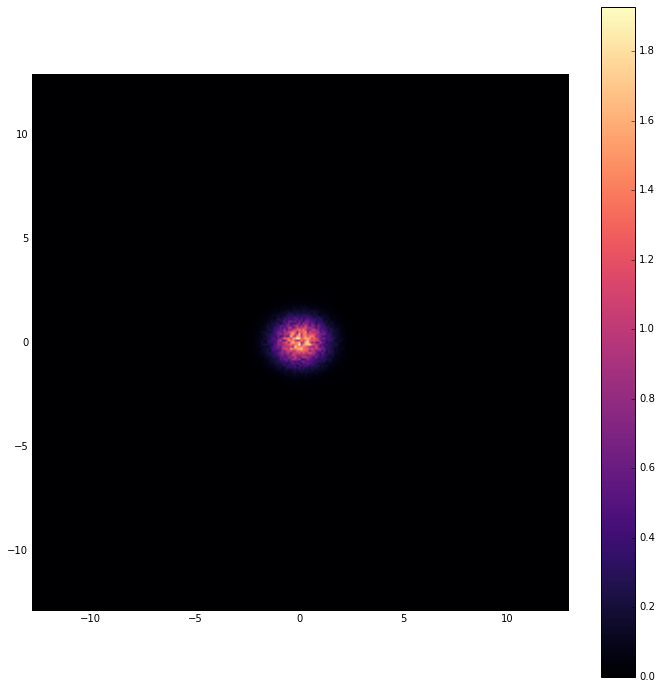

In [29]:
plotState(abs(PSI_gpu.get()))

## [PyFFT](http://pythonhosted.org/pyfft/)

In [30]:
from pyfft.cuda import Plan ## FFT in CUDA

In [31]:
gpuFFT = Plan((Nx,Ny),dtype=precComplex)

## $$\tilde{\Psi}_{k_i,k_j}^0 = FFT(\Psi_{i,j}^0)$$

In [32]:
gpuFFT.execute(PSI_gpu,PSIaux_gpu)

## $$\tilde{\Psi}_{k_i,k_j}^{\tau+1} = \frac{1}{1+\frac{1}{2}\Delta \tau(k_i^2+k_j^2+2\alpha) }\big[\tilde{\Psi}_{k_i,k_j}^\tau -\Delta \tau FFT(\tilde{v}_{i,j}\Psi_{i,j}^{\tau}+ g_{2D}|\Psi_{i,j}^{\tau}|^2\Psi_{i,j}^{\tau}-\alpha\Psi_{i,j}^{\tau})_{k_i,k_j} \big]$$

In [34]:
relax = '''
#include <pycuda-complex.hpp>
#define pi 3.14159265
#define phi 1.6180339
#include <stdio.h>

__device__ cudaPres KspaceFFT(int tid, int nPoint, cudaPres L){
cudaPres Kfft;
if (tid < nPoint/2){
  Kfft = 2.0f*pi*(tid)/L;
  }
else {
Kfft = 2.0f*pi*(tid-nPoint)/L;
}
return Kfft;
}

__global__ void getAlphas_kernel( cudaPres dx, cudaPres dy, 
cudaPres xMin, cudaPres yMin, 
cudaPres gammaX, cudaPres gammaY,   cudaPres constG,
pycuda::complex<cudaPres> *psi1, pycuda::complex<cudaPres> *alphas){
int t_i = blockIdx.x*blockDim.x + threadIdx.x;
int t_j = blockIdx.y*blockDim.y + threadIdx.y;
int tid = gridDim.y * blockDim.y * t_i  + t_j;
cudaPres result = 0.0;
cudaPres ri = t_i*dx + xMin;
result += 0.5*gammaX*gammaX*ri*ri;

ri = t_j*dy + yMin;
result += 0.5*gammaY*gammaY*ri*ri;

ri = abs(psi1[tid]);
alphas[tid] =  result + constG*ri*ri;

}

__global__ void implicitStep1_kernel( cudaPres xMin, cudaPres yMin, cudaPres dx, cudaPres dy,  
cudaPres alpha,  cudaPres gammaX, cudaPres gammaY, cudaPres constG,
 pycuda::complex<cudaPres> *psi1_d){
int t_i = blockIdx.x*blockDim.x + threadIdx.x;
int t_j = blockIdx.y*blockDim.y + threadIdx.y;
int tid = gridDim.y * blockDim.y * t_i  + t_j;

cudaPres result = 0.0;
cudaPres ri = t_i*dx + xMin;
result += 0.5*gammaX*gammaX*ri*ri;

ri = t_j*dy + yMin;
result += 0.5*gammaY*gammaY*ri*ri;

pycuda::complex<cudaPres> psi1; //,Vtrap,torque;//psi1, psi2, psi3, partialX, partialY, Vtrap, torque, lz, result;

psi1 = psi1_d[tid];
ri = abs(psi1);
result *= -1;
result += alpha;
result -= constG*ri*ri;

psi1_d[tid] = psi1*result;
}

__global__ void implicitStep2_kernel( cudaPres dt, cudaPres alpha, 
int nPointX, int nPointY,  cudaPres Lx, cudaPres Ly, 
pycuda::complex<cudaPres> *psiTransf, pycuda::complex<cudaPres> *GTranf){
int t_i = blockIdx.x*blockDim.x + threadIdx.x;
int t_j = blockIdx.y*blockDim.y + threadIdx.y;
int tid = gridDim.y * blockDim.y * t_i  + t_j;

cudaPres k2 = 0.0;
cudaPres kAux = KspaceFFT(t_i,nPointX, Lx);//kx[t_j];
k2 += kAux*kAux;
kAux = KspaceFFT(t_j,nPointY, Ly);//ky[t_i];
k2 += kAux*kAux;

pycuda::complex<cudaPres> factor, psiT, Gt;
// factor = 2.0 / ( 2.0 + dt*(k2 + 2.0*alpha) );
kAux = 2.0 / ( 2.0 + dt*(k2 + 2.0*alpha) );
psiT = psiTransf[tid];
Gt = GTranf[tid];
psiTransf[tid] = kAux * ( psiT + Gt*dt);

}

'''

In [35]:
relaxK = compileGPU(relax)

In [36]:
step1 =relaxK.get_function('implicitStep1_kernel')
step2 =relaxK.get_function('implicitStep2_kernel')
getAlphas = relaxK.get_function('getAlphas_kernel')

In [37]:
step1.prepare('ffffffffP')#cudaPres xMin, cudaPres yMin, cudaPres dx, cudaPres dy,  
#cudaPres alpha,  cudaPres gammaX, cudaPres gammaY, cudaPres constG,
# pycuda::complex<cudaPres> *psi1_d
step2.prepare('ffiiffPP')#cudaPres dt, cudaPres alpha, 
#int nPointX, int nPointY,  cudaPres Lx, cudaPres Ly, 
#pycuda::complex<cudaPres> *psiTransf, pycuda::complex<cudaPres> *GTranf
getAlphas.prepare('fffffffPP') #cudaPres dx, cudaPres dy, 
#cudaPres xMin, cudaPres yMin, 
#cudaPres gammaX, cudaPres gammaY,  cudaPres constG,
#pycuda::complex<cudaPres> *psi1, pycuda::complex<cudaPres> *alphas

## $$\tilde{v}_{i,j}\Psi_{i,j}^{\tau}+ g_{2D}|\Psi_{i,j}^{\tau}|^2\Psi_{i,j}^{\tau}-\alpha\Psi_{i,j}^{\tau}$$

In [38]:
step1.prepared_call(gridDims, blockDims,x_min,y_min, 
                    dx,dy,a,gammaX,gammaY,
                    g,PSI_gpu.gpudata) # Optimizing GPU memory

In [39]:
gpuFFT.execute(PSI_gpu)

## $$\tilde{\Psi}_{k_i,k_j}^{\tau+1} = \frac{1}{1+\frac{1}{2}\Delta \tau(k_i^2+k_j^2+2\alpha) }\big[\tilde{\Psi}_{k_i,k_j}^\tau -\Delta \tau FFT(\tilde{v}_{i,j}\Psi_{i,j}^{\tau}+ g_{2D}|\Psi_{i,j}^{\tau}|^2\Psi_{i,j}^{\tau}-\alpha\Psi_{i,j}^{\tau})_{k_i,k_j} \big]$$

In [40]:
step2.prepared_call(gridDims, blockDims, dtau, a, Nx, Ny, Lx,Ly,
                    PSIaux_gpu.gpudata, PSI_gpu.gpudata)

## $$IFFT(\tilde{\Psi}_{k_i,k_j}^{1})$$

In [41]:
gpuFFT.execute(PSIaux_gpu,PSI_gpu,inverse=True)

## $$\Psi_{i,j}^{1} = \frac{IFFT(\tilde{\Psi}_{k_i,k_j}^{1})}{||IFFT(\tilde{\Psi}_{k_i,k_j}^{1})||}$$

In [53]:
# PyCUDA nice functions!
from pycuda.elementwise import ElementwiseKernel
mult_C = ElementwiseKernel(arguments="{0} a, pycuda::complex<{0}> *psi".format( cuPrec ),
				operation = "psi[i] = a*psi[i] ",
				name = "multiplyByFloat_kernel",
				preamble="#include <pycuda-complex.hpp>")
from pycuda.reduction import ReductionKernel
get_Norm_C = ReductionKernel( prec,
				neutral = "0",
				arguments=" {0} dx, {0} dy,  pycuda::complex<{0}> * psi ".format(cuPrec),
				map_expr = "( conj(psi[i])* psi[i] )._M_re*dx*dy",
				reduce_expr = "a+b",
				name = "getNorm_kernel",
				preamble="#include <pycuda-complex.hpp>")

In [54]:
# My function to normalize
def normalizeGPU(psiGPU):
    norm = get_Norm_C(dx,dy,psiGPU).get()
    norm = 1/sqrt(norm)
    mult_C(norm,psiGPU)
    return norm

In [44]:
get_Norm_C(dx,dy,PSI_gpu).get()

array(1.2607640027999878, dtype=float32)

In [45]:
normalizeGPU(PSI_gpu)

0.89060088163946172

In [46]:
normalizeGPU(PSI_gpu)

1.0

## $$A_{i,j}=\tilde{v}_{i,j}+g_{2D}|\Psi_{i,j}^\tau|^2$$ $$\alpha = 0.5(max(A)+min(A))$$
[Ref1](http://dx.doi.org/10i,j.1016/j.cpc.2008.12.003) 

In [47]:
getAlphas.prepared_call(gridDims, blockDims,dx,dy,
                        x_min,y_min,
                        gammaX,gammaY,g,
                        PSI_gpu.gpudata,PSIaux_gpu.gpudata)

In [48]:
a = 0.5*(gpuarray.max(PSIaux_gpu.real).get()+gpuarray.max(PSIaux_gpu.imag).get())

## **QUIZ: Calculate $\mu$ or $|\Psi^\tau-\Psi^{\tau+1}|$ to ensure convergence**

In [64]:
nit = 10000
for i in range(nit):
    gpuFFT.execute(PSI_gpu,PSIaux_gpu)
    step1.prepared_call(gridDims, blockDims,x_min,y_min, 
                    dx,dy,a,gammaX,gammaY,
                    g,PSI_gpu.gpudata)
    gpuFFT.execute(PSI_gpu)
    step2.prepared_call(gridDims, blockDims, dtau, a, Nx, Ny, Lx,Ly,
                    PSIaux_gpu.gpudata, PSI_gpu.gpudata)
    gpuFFT.execute(PSIaux_gpu,PSI_gpu,inverse=True)
    normalizeGPU(PSI_gpu)
    getAlphas.prepared_call(gridDims, blockDims,dx,dy,
                        x_min,y_min,
                        gammaX,gammaY,g,
                        PSI_gpu.gpudata,PSIaux_gpu.gpudata)
    a = 0.5*(gpuarray.max(PSIaux_gpu.real).get()+gpuarray.max(PSIaux_gpu.imag).get())
    #print a

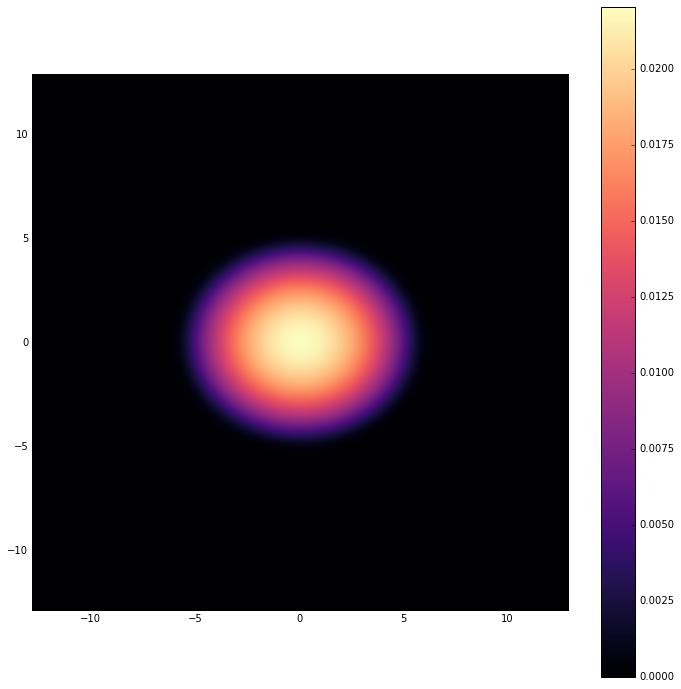

In [65]:
plotState(abs(PSI_gpu.get())**2)

## PLUS: Split operator in PyCUDA

>Se basa en el hecho de tener una ecuacion de tipo:

$$\partial_t \Psi = \hat{\mathcal{L}}\Psi + \hat{\mathcal{N}}(\Psi,t)\Psi$$

>con $\mathcal{L}$ un operado lineal y $\mathcal{N}$ uno no-lineal (ambos acotados en algun sentido). La solucion general es:

$$ \Psi(t)=e^{t(\mathcal{L}+\mathcal{N})}\Psi(t_0) $$

>Cuando el sistema es facilmente integrable por separado, ie. 
$$\partial_t \Psi = \hat{\mathcal{L}}\Psi \rightarrow \Psi(r,t_0+t) = e^{t\hat{\mathcal{L}}}\Psi(r,t_0)$$
$$\partial_t \Psi = \hat{\mathcal{N}}(\Psi,t)\Psi \rightarrow \Psi(r,t_0+t) = e^{\int_0^tdt'\hat{\mathcal{N}}(\Psi,t')}\Psi(r,t_0)$$

>Se puede realizar una aproximacion de la solucion (a $\delta t$) en termino de las soluciones anteriores, mediante la adecuada aplicacion de los operadores por separado, es decir:

$$\displaystyle e^{\delta t(\mathcal{L}+\mathcal{N})} \approx \prod_{s=1}^{k} e^{a_s\delta t \mathcal{L}}e^{b_s\delta t\mathcal{N}} $$


en general el numero de composiicones determina la complejidad del metodo y el orden $p$ del metodo (ie el error es de tamaño $(\delta t)^p$). Ejemplos de algoritmos son:

> - **Orden lieneal** $p=1$ (Lie-Trotter)
$$ \Psi(\delta t)=e^{\delta t \mathcal{L}}e^{\delta t\mathcal{N}}\Psi_0 $$ o $$ \Psi(\delta t)=e^{\delta t\mathcal{N}}e^{\delta t \mathcal{L}}\Psi_0 $$ y $\Psi_0 = \Psi(t_0)$ la condicion inicial

> - **Segundo orden** $p=2$ (Strang)
$$ \Psi(\delta t)=e^{\delta t \mathcal{L}/2}e^{\delta t\mathcal{N}}e^{\delta t \mathcal{L}/2}\Psi_0 \equiv \hat{U}(\delta t)_{p=2}\Psi_0$$ o $$ \Psi(\delta t)=e^{\delta t \mathcal{N}/2}e^{\delta t\mathcal{L}}e^{\delta t \mathcal{N}/2}\Psi_0 $$ 

> - **Cuarto orden** $p=4$ 
$$ \Psi(\delta t)=\hat{U}(\omega\delta t)_{p=2}\hat{U}((1-2\omega)\delta t)_{p=2}\hat{U}(\omega\delta t)_{p=2}\Psi_0 \\ = e^{\omega\delta t \mathcal{N}/2}e^{\omega\delta t\mathcal{L}}\, e^{(1-\omega)\delta t \mathcal{N}/2}e^{(1-2\omega)\delta t\mathcal{L}}e^{(1-\omega)\delta t \mathcal{N}/2} \, e^{\omega\delta t\mathcal{L}}e^{\omega\delta t \mathcal{N}/2}  \\ = e^{\omega\delta t \mathcal{L}/2}e^{\omega\delta t\mathcal{N}}\, e^{(1-\omega)\delta t \mathcal{L}/2}e^{(1-2\omega)\delta t\mathcal{N}}e^{(1-\omega)\delta t \mathcal{L}/2} \, e^{\omega\delta t\mathcal{N}}e^{\omega\delta t \mathcal{L}/2},$$ $\omega = \frac{2+2^{1/3}+2^{-1/3}}{3}$


notemos que todos lo metodos son simetricos ante el intercambio de $\mathcal{N}$ y $\mathcal{L}$

Consideremos el caso de orden $p=2$

### $$ \Psi(\delta t)=e^{\delta t \frac{1}{4}\nabla^2}e^{-\delta t(v+g|\Psi|^2)}e^{\delta t \frac{1}{4}\nabla^2}\Psi_0 \equiv \hat{U}(\delta t)_{p=2}\Psi_0$$

In [57]:
initGPU.prepared_call(gridDims, blockDims,
                      prec(dx),prec(dy),
                     prec(x_min),prec(y_min),
                     prec(gammaX),prec(gammaY),
                     real_gpu.gpudata,imag_gpu.gpudata,PSI_gpu.gpudata)

In [58]:
stepStrangL = '''
      #include <pycuda-complex.hpp>
      #define pi 3.14159265
      __device__ cudaPres KspaceFFT(int tid, int nPoint, cudaPres L){
      cudaPres Kfft;
      if (tid < nPoint/2){
          Kfft = 2.0f*pi*(tid)/L;
      }
      else {
          Kfft = 2.0f*pi*(tid-nPoint)/L;
      }
      return Kfft;
      }
      
      __global__ void strangL_kernel( int nx, int ny,
      cudaPres dtau,
      cudaPres Lx, cudaPres Ly,
      pycuda::complex<cudaPres> *fftpsi){
      // Index for thread
      int t_i = blockIdx.x*blockDim.x + threadIdx.x;
      int t_j = blockIdx.y*blockDim.y + threadIdx.y;
      int tid = gridDim.y * blockDim.y * t_i  + t_j;
      // Indices to coordinates
      cudaPres kx = KspaceFFT( t_i,  nx,  Lx);
      cudaPres ky = KspaceFFT( t_j,  ny,  Ly);

      fftpsi[tid] *= exp(-dtau*0.25cString*(kx*kx+ky*ky));
      
      }
'''

In [59]:
stepStrangNL = '''
      #include <pycuda-complex.hpp>
      
      __global__ void strangNL_kernel(cudaPres dtau, cudaPres gNonLinear,
      cudaPres dx, cudaPres dy,
      cudaPres xMin, cudaPres yMin,
      cudaPres gammaX, cudaPres gammaY,
      pycuda::complex<cudaPres> *psi){
      // Index for thread
      int t_i = blockIdx.x*blockDim.x + threadIdx.x;
      int t_j = blockIdx.y*blockDim.y + threadIdx.y;
      int tid = gridDim.y * blockDim.y * t_i  + t_j;
      // Indices to coordinates
      cudaPres x = t_i*dx + xMin;
      cudaPres y = t_j*dy + yMin;
      pycuda::complex<cudaPres> auxC=psi[tid];
      auxC = x*x*gammaX*gammaX+y*y*gammaY*gammaY+gNonLinear*abs(auxC)*abs(auxC);
      psi[tid] *= exp(-dtau*auxC._M_re);
      
      }
'''

In [60]:
strangL = compileGPU(stepStrangL)
strangLinear = strangL.get_function('strangL_kernel')
strangNL = compileGPU(stepStrangNL)
strangNLinear = strangNL.get_function('strangNL_kernel')

In [61]:
strangLinear.prepare('iifffP')
strangNLinear.prepare('ffffffffP')

In [68]:
iterations = 1000
for i in range(iterations):
    gpuFFT.execute(PSI_gpu)
    strangLinear.prepared_call(gridDims, blockDims,
                           int32(Nx),int32(Ny),
                           prec(dtau),prec(Lx),prec(Ly),
                           PSI_gpu.gpudata)
    gpuFFT.execute(PSI_gpu, inverse=True)
    strangNLinear.prepared_call(gridDims, blockDims,
                           prec(dtau),prec(g),
                           prec(dx),prec(dy),
                           prec(x_min),prec(y_min),
                           prec(gammaX),prec(gammaY),
                           PSI_gpu.gpudata)
    gpuFFT.execute(PSI_gpu)
    strangLinear.prepared_call(gridDims, blockDims,
                           int32(Nx),int32(Ny),
                           prec(dtau),prec(Lx),prec(Ly),
                           PSI_gpu.gpudata)
    gpuFFT.execute(PSI_gpu, inverse=True)
    norma = get_Norm_C(prec(dx),prec(dy),PSI_gpu).get()
    #print norma 
    inv = 1/sqrt(norma)
    mult_C(inv,PSI_gpu)

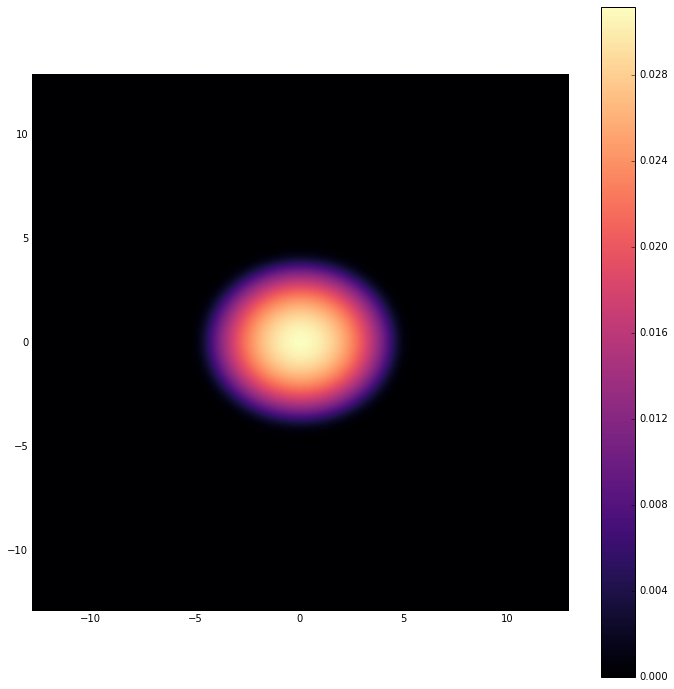

In [69]:
plotState(abs(PSI_gpu.get())**2)

## **QUIZ: which method converge faster?, which is faster?, which is most favorable in memory spend? is the same result?**